# Tarea 1 
# Física computacional
## Aquino Chapa Martha Abril
##### Hecho en Python 🐍

 <span style='color:green'>

In [ ]:
#importamos las paqueterías
from pylab import *
import random
from numpy import array
from numpy import *
import math

## 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:
#### (a) Encuentre una expresión para la segunda derivada numérica de orden 4 con malla uniforme. (Se desprecian téminos $h^{5}$ en la serie de Taylor)


Iniciamos expandiendo en serie de Taylor la función f en 4 diferentes puntos alrededor de $x_0$

$$
f(x_0+h)=f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 + \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-h)=f(x_0) - f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 - \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0+2h)=f(x_0) + 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-2h)=f(x_0) - 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
Debido a que queremos la segunda derivada de orden cuatro despreciamos los términos de orden $h^5$, sumamos la primera y segunda expresión así como la tercera y cuarta expresión. Con lo que obtenemos las siguientes dos ecuaciones:

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f^{(2)}(x_0)h^2 + \frac{1}{12}f^{(4)}(x_0)h^4
$$
$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$

Ahora mutiplicamos la primera de estas igualdades por $16$ y la segunda igualdad por $-1$ y obtenemos el siguiente sistema de ecuaciones:
$$
16f(x_0+h)+16f(x_0-h)=32f(x_0) + 16f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$
$$
-f(x_0+2h)-f(x_0-2h)=-2f(x_0)-4f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(4)}(x_0)h^4
$$
Al sumar las dos ecuaciones anteriores se obtiene: 
$$
16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h)=30f(x_0)+12f^{(2)}(x_0)h^2
$$

Por lo que tenemos la expresión para la segunda derivada de orden cuatro:

$$
f^{(2)}(x_0) = \frac{16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h) - 30f(x_0)}{12h^2}
$$
Donde se ha tomado $h=x_{i+1}-x_i$, por lo cual hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera. 

Veamos el caso de la frontera izquiera, para esto, usaremos los h, 2h, 3h, 4h es decir nos estamos tomando los puntos a la derecha.
Realizando las expansiones en serie de Taylor correspondiente, despresiando terminos $h^{5}$, se obtiene:

$$f(x_0+h)=f(x_0)+hf^{(1)}(x_0)+{\frac{1}{2}}f^{(2)}(x_0)h^{2}+\frac{f^{(3)}(x_0)}{3!}h^{3}+{\frac{f^{(4)}}{4!}}h^{4}   $$


$$f(x_0+2h)=f(x_0)+2hf^{(1)}(x_0)+{\frac{4}{2}}f^{(2)}(x_0)h^{2}+\frac{8f^{(3)}(x_0)}{3!}h^{3}+{16\frac{f^{(4)}}{4!}}h^{4}   $$

$$f(x_0+3h)=f(x_0)+3hf^{(1)}(x_0)+{\frac{9}{2}}f^{(2)}(x_0)h^{2}+\frac{27f^{(3)}(x_0)}{3!}h^{3}+{81\frac{f^{(4)}}{4!}}h^{4}   $$

$$f(x_0+4h)=f(x_0)+4hf^{(1)}(x_0)+{\frac{16}{2}}f^{(2)}(x_0)h^{2}+\frac{64f^{(3)}(x_0)}{3!}h^{3}+{256\frac{f^{(4)}}{4!}}h^{4}   $$

Es posible ver el sistema anterior como la siguiente matriz:
$$
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24} \\
2 & 2 & \frac{4}{3} & \frac{2}{3} \\
3 & \frac{9}{2} & \frac{9}{2} & \frac{27}{8} \\
4 & 8 & \frac{32}{3} & \frac{32}{3}
\end{bmatrix}
\begin{bmatrix}
hf_i' \\
h^2f_i'' \\
h^3f_i''' \\
h^4f_i''''
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i \\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}
$$
Cuya solución para la segunda derivada es:

$$f^{(2)}(x_0)={\frac{-104(f_{i+1}-f_i)+114(f_{i+2}-f_i)-56(f_{i+3}-f_i)+11(f_{i+4}-f_i)}{12h^{2}}}  $$
Lo cual se puede reducir a lo siguiente:

$$f^{(2)}(x_0)={\frac{-104f_{i+1}+114f_{i+2}-56f_{i+3}+11f_{i+4}+35f_i)}{12h^{2}}}  $$
Esta ecuación es para la ''primera'' frontera izquierda, para el segundo punto en la malla simplemente se debe tomar $i\rightarrow i+1$, además para la frontera derecha basta hacer los siguientes cambios $i+1\rightarrow i-1$, $i+2\rightarrow i-2$, $i+3\rightarrow i-3$, $i+4\rightarrow i-4$, así como utilizar i=N.
Ahora definamos una función en Python con la que se obtenga la segunda derivada de orden 4.

In [2]:
#Definimos la segunda derivada de orden 4 para una función f cuya malla es uniforme.
def deriv(f,x):
    f_prima1 = zeros(len(f))
    h=x[1]-x[0]
   
    for i in range (2,len(f)-2):
        f_prima1[i]=(16*f[i+1]+16*f[i-1]-f[i+2]-f[i-2]-30*f[i])/(12*h*h)
    
       #Calculamos los puntos frontera a la izquierda
        f_prima1[0] = (-(26/3)*f[1]+(19/2)*f[2]-(14/3)*f[3]+(11/12)*f[4]+(35/12)*f[0])/(h*h)
        f_prima1[1] = (-(26/3)*f[2]+(19/2)*f[3]-(14/3)*f[4]+(11/12)*f[5]+(35/12)*f[1])/(h*h)
        
        #Calculando los puntos para frontera a la derecha
        f_prima1[-2]=((-26/3)*f[-3]+(19/2)*f[-4]-(14/3)*f[-5]+(11/12)*f[-6]+(35/12)*f[-2])/(h*h)
        f_prima1[-1]=((-26/3)*f[-2]+(19/2)*f[-3]-(14/3)*f[-4]+(11/12)*f[-5]+(35/12)*f[-1])/(h*h)
    return f_prima1

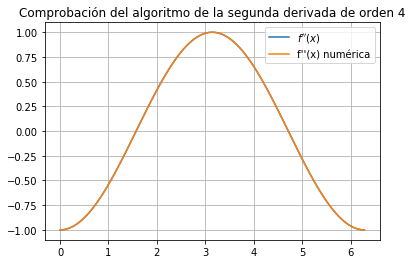

In [42]:
#Comprobando que la función anterior se aproxima a la segunda derivada 
###Escogemos la malla uniforme
x1 = linspace(0,2*pi,500)
#Escogemos la función de prueba
y1 =cos(x1)
y_deriv2 =-cos(x1)
y_num_deriv2 = deriv(y1,x1)
#Graficamos para corroborar que la derivada numerica corresponde con la derivada analítica
title("Comprobación del algoritmo de la segunda derivada de orden 4")
plot(x1,y_deriv2,label="$f''(x)$")
plot(x1,y_num_deriv2,label="f''(x) numérica")
legend(),grid()
show()


##### (b) Encuentre una expresión para la derivada numérica de 2o orden para una malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor).
Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces las siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$
f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Multiplicamos por $h_2^{2}$ la primera y por $h_1^{2}$ la segunda ecuación


$$ h_2^{2}f(x_0-h_1)=h_2^{2}f(x_0)-h_2^{2}f^{(1)}(x_0)h_1+{\frac{1}{2}}f^{(2)}(x_0)h_1^{2}h_2^{2}+\mathcal{O}(h^{3})  $$

$$
h_1^{2}f(x_0+h_2)=h_1^{2}f(x_0)+h_1^{2}f^{(1)}(x_0)h_2 + h_1^{2}\frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$

Restando las dos ecuaciones anteriores y despreciando los términos al cubo
$$h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)=f(x_0)(h_1^{2}-h_2^{2})+f^{(1)}(x_0)(h_2^{2}h_1+h_2h_1^{2}) $$

Por lo cual se obtiene que la expresión para la segunda derivada de 2do orden, en los puntos que no están en la frontera es:
$$ f^{(1)}(x_0)={\frac{h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)-f(x_0)(h_1^{2}-h_2^{2})}{h_2^{2}h_1+h_2h_1^{2}}} $$
Obteniendo ahora la derivada para los puntos frontera, iniciemos con la frontera derecha, por lo cual tomaremos h1=x1-x0, h2=x2-x0.
Realizamos la expansión en serie de Taylor:

$$
f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Despreciando los términos al cubo y situando el sistema anterior como un sistema matricial obtenemos que:

$$
\begin{bmatrix}
h1 & \frac{h1^{2}}{2}\\ 
h2& \frac{h2^{2}}{2} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' 
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i 
\end{bmatrix}
$$

El cual al resolver para f' se obtiene :
$$f'(x_0)=\frac{-(f_{i+2}-f_i)h_1^{2}+h_2^{2}(f_{i+1}-f_i)}{h_1h_2^{2}-h_1^{2}h_2}    $$

Lo que podemos reducir a:
$$f'(x_0)=\frac{-h_1^{2}f_{i+2}+h_2^{2}f_{i+1}+f_i(-h_2^{2}+h_1^{2})}{h_1h_2^{2}-h_1^{2}h_2}   $$
Esta ecuación es para la frontera izquierda, para la frontera derecha basta hacer los siguientes cambios $i+1\rightarrow i-1$, $i+2\rightarrow i-2$, así como utilizar i=N.
Definamos ahora la función que nos de la primera derivada de orden 2 con una malla no uniforme.

In [3]:
#Definimos la funcion para la primera derivada en un malla no uniforme
def deriv_1(f,x):
    f_prima = zeros(len(f))
    for i in range (1,len(f)-1):
        f_prima[i]=(((x[i]-x[i-1])**2)*(f[i+1])-((x[i+1]-x[i])**2)*f[i-1]-f[i]*((x[i]-x[i-1])**2-(x[i+1]-x[i])**2))/((x[i+1]-x[i])**2*(x[i]-x[i-1])+(x[i]-x[i-1])**2*(x[i]-x[i-1]))
       #Obtenemos la derivada en la frontera:
        h1=x[1]-x[0]
        h2=x[2]-x[0]
        
        h11=(x[-1]-x[-2])
        h22=(x[-1]-x[-3])
        ## Iniciamos con la frontera izquierda
        f_prima[0]=(-h1**2*f[2]+h2**2*f[1]+f[0]*(-h2**2+h1**2))/(h1*h2**2-h1**2*h2)
        #Ahora obtenemos con la frontera derecha
        f_prima[-1]=((+h11**2*f[-3])-h22**2*f[-2]+f[-1]*(+h22**2-h1**2))/(h11*h22**2-h11**2*h22)
    return f_prima

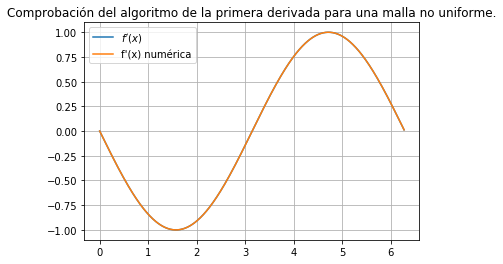

In [43]:
#Probando que la función anterior se acopla bien a la primera derivada analítica
#Definimos la malla uniforme 
x = (np.linspace(0, 2*pi, 500, endpoint=False))
#Definimos la función a la que le aplicaremos la derivada
y = cos(x)
#Definimos la primera derivada analítica
y_deriv =-sin(x)
#Definimos la primera derivada númerica
y_deriv_1_num = deriv_1(y,x)

#Las graficamos para comparar las primera derivadas y revisar que el código funciona adecuadamente
title("Comprobación del algoritmo de la primera derivada para una malla no uniforme.")
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_deriv_1_num,label="f'(x) numérica")
legend(),grid()
show()
##Se aprecia que la derivada analítica se acopla a la derivada númerica

##### (c) Encuentre una expresión para la segunda derivada numérica de 2o orden con malla no uniforme. (Se desprecian términos $h^{3}$  en la serie de Taylor)

Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces las siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$ f(x0-h_1)=f(x_0)-f^{(1)}(x_0)h_1+{1/2}f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ f(x0+h_2)=f(x_0)+f^{(1)}(x_0)h_2+{1/2}f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Multiplicando por $h_1$ y por $h_2$ la segunda y la primera ecuación se obtiene que:

$$ h_2f(x0-h_1)=h_2f(x_0)-h_2f^{(1)}(x_0)h_1+{1/2}h_2f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ h_1f(x0+h_2)=h_1f(x_0)+h_1f^{(1)}(x_0)h_2+{1/2}h_1f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Sumando las ecuaciones anteriores y despreciando términos al cubo:
$$h_2f(x_0-h_1)+h_1f(x_0+h_2)=f(x_0)(h_2+h_1)+{\frac{1}{2}}f^{(2)}(x_0)(h_2h_1^{2}+h_1h_2^{2}) $$

$$ f^{(2)}(x_0)=2*\frac{h_2f(x_0-h_1)+h_1f(x_0+h_2)-f(x_0)(h_2+h_1)}{(h_2h_1^{2}+h_1h_2^{2})} $$

Obteniendo ahora la derivada para los puntos frontera, inciemos con la frontera derecha, por lo cual tomaremos h1=x1-x0, h2=x2-x0.
Realizamos la expansión en serie de Taylor:
$$
f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Despreciando los términos al cubo y situando el sistema anterior como un sistema matricial obtenemos que:
$$
\begin{bmatrix}
h1 & \frac{h1^{2}}{2}\\ 
h2& \frac{h2^{2}}{2} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' 
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i 
\end{bmatrix}
$$

Al resolver el sistema anterior para $f^{(2)}$ se obtiene:
$$f''(x_0)= 2*{\frac{(f_{i+2}-f_i)*h_1-(f_{i+1}-f_i)h_2}{h_1h_2^{2}-h_1^{2}h_2}}  $$
Lo cual se puede reducir a:

$$f''(x_0)=2*{\frac{f_{i+2}h_1-h_2f_{i+1}+f_i(h_2-h_1)}{h_1h_2^{2}-h_1^{2}h_2}}  $$
Esta ecuación es para la frontera izquierda, para la frontera derecha basta hacer los siguientes cambios  𝑖+1→𝑖−1 ,  𝑖+2→𝑖−2, así como utilizar i=N.
Definiendo ahora una función segunda derivada con una malla no uniforme:

In [4]:
#Definimos la funcion segunda derivada para una función f y cuya malla no es necesariamente uniforme.
def deriv_2(f,x):
    f_prima2 = zeros(len(f))

    for i in range (1,len(f)-1):
        h1=x[i]-x[i-1]
        h2=x[i+1]-x[i]
        f_prima2[i]=(2/(h2*h1**2+h1*h2**2))*(h2*f[i-1]+h1*f[i+1]-f[i]*(h2+h1))
    # Obteniendo la derivada en las fronteras
    #frontera izquierda
        h11=x[1]-x[0]
        h22=x[2]-x[0]
        f_prima2[0]=(2/(h11*h22**2-h11**2*h22))*(f[2]*h11-h22*f[1]+f[0]*(h22-h11))
        
     #frontera derecha
        h111=x[-1]-x[-2]
        h222=x[-1]-x[-3]
        f_prima2[-1]=(2/(h111*h222*h222-h111**2*h222))*(f[-3]*h111-h222*f[-2]+f[-1]*(h222-h111))
        
    return f_prima2

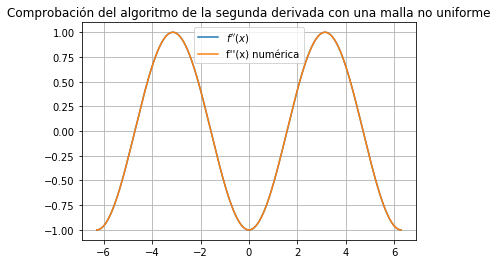

In [44]:
#Probando la función anterior
###Escogemos la malla
x = (np.linspace(-2*pi, 2*pi, 5000) )
##Escogemos la funcion f a la cual le aplicaremos la segunda derivada
y = cos(x)
y_deriv2 = -cos(x)
y_num_deriv_2 = deriv_2(y,x)
title("Comprobación del algoritmo de la segunda derivada con una malla no uniforme")
plot(x,y_deriv2,label="$f''(x)$")
plot(x,y_num_deriv_2,label="f''(x) numérica")
legend(),grid()
show()

## 2. Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cada uno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

Iniciamos obteniendo el tiempo con una malla uniforme y con la función segunda derivada de orden 4:

In [45]:
#Definimos la malla uniforme con 500 puntos 
x = (np.linspace(0, 2*pi, 500))
#Definimos la función a la que le aplicaremos la derivida
y = cos(x)
#Definimos la segunda derivada númerica de orden 4
y_deriv_1_num = deriv(y,x)

#Obtenemos el tiempo promedio 
%timeit (deriv(y,x))

10.4 ms ± 791 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Obteniendo el tiempo con una malla no uniforme y con la función primera derivada de orden 2:


In [46]:
#Definimos la malla uniforme con 500 puntos
x = (np.linspace(0, 2*pi, 500))
#Definimos la función a la que le aplicaremos la función primera derivida
y = cos(x)

#Definimos la primera derivada númerica
y_deriv_1_num = deriv_1(y,x)

#Obtenemos el promedio tiempo
%timeit (deriv_1(y,x))

16.5 ms ± 962 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Obteniendo el tiempo de la función segunda derivada, en una malla no uniforme, de orden 2:

In [47]:
###Escogemos la malla 
x = (np.linspace(0, 2*pi, 500) )
##Escogemos la funcion f a la cual le aplicaremos la segunda derivada
y = cos(x)
#Obtenemos el tiempo promedio de la función 
%timeit (deriv_2(y,x))

10.5 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


De comparar los tiempo promedio se aprecia  que el tiempo más rápido fue el correspondiente a la función segunda derivada en una malla uniforme, 11.1 ms ± 781 µs per loop (mean ± std. dev. of 7 runs, 100 loops each), en comparación con la de una malla no uniforme 11.6 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 100 loops each) y el tiempo promedio correspondiente a la primer derivada fue 16.9 ms ± 503 µs per loop (mean ± std. dev. of 7 runs, 100 loops each). Una de las ventajas de esto es que la segunda derivada, con mayor precisión en una malla uniforme, la de orden cuatro, posee un mejor rendimiento en el tiempo. Sin embargo dependiendo de la información que poseemos será más conveniente usar una en vez de la otra, por ejemplo si tenemos una malla no uniforme, la  segunda derivada derivada en una malla uniforme no será una buena aproximación a la derivada de la función y en ese caso sería más preciso usar la segunda derivada en una malla no uniforme pese a que posee "menos precisión".

### 3. Calcule la derivada analítica de las funciones $f(x) = e^{−x^{2}} sin(10x)$ con $x \in [−5, 5]$ , y $g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$ con $x \in [0.5, 5]$. Realice las gráficas de las funciones y sus primeras dos derivadas. Con las funciones del problema 1, encuentre una malla adecuada para cada caso en el que el error de cálculo sea menor que $10−5$ para cualquier punto. ¿Las mallas tienen el mismo espacio entre puntos de la malla?, explique porque si o porque no.

Iniciemos obtiendo las derivadas analíticas:
$$f'(x)=2e^{-x^{2}}(5\cos(10x)-x\sin(10x) $$
$$f^{(2)}=e^{-x^{2}}(2(2x^{2}-51)\sin(10x)-40x\cos(10x))$$
Por otro lado::
$$g'(x)={\frac{12}{x^{-7}}}-{\frac{12}{x^{13}}} $$ 

$$g''(x)=-\frac{84}{x^{-8}}+\frac{156}{x^{-14}}  $$

Iniciamos graficando las funciónes:
Para $f(x) = e^{−x^{2}} sin(10x)$ con $x \in [−5, 5]$

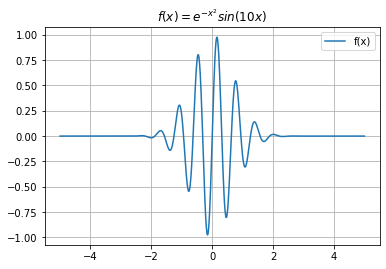

In [32]:
x=(linspace(-5,5,1000))
y=exp(-(x**2))*sin(10*x)
plot(x,y,label="f(x)")
title(r"$f(x) = e^{−x^{2}} sin(10x)$")
legend(),grid()
show()


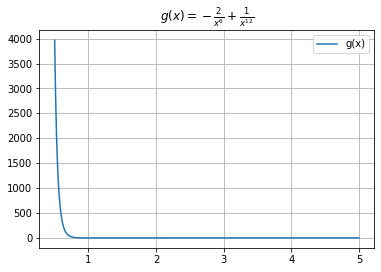

In [33]:
x=(linspace(0.5,5,1000))
y=-2/x**6+1/x**12
plot(x,y,label="g(x)")
title(r"$g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$")
legend(),grid()
show()

Obteniendo ahora las derivadas de las funciones f(x) y g(x).

Iniciemos con la función f(x).

C:\Users\marth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


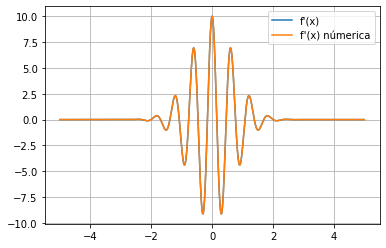

Error de la derivada usando la función de primer derivada en una malla no uniforme = 1.811079286540007e-08


In [34]:
#Definimos la malla
x=(linspace(-5,5,1000000))
#La función es:
f=exp(-(x**2))*sin(10*x)
# La primer derivada analítica es:
fprima1=2*exp(-(x*x))*(5*cos(10*x)-x*sin(10*x))
#La primer derivada númerica con la función de primer derivada para una malla no uniforme
fprima1_num=deriv_1(f,x)
#Graficamos ambas derivadas
plot(x,fprima1,label="f'(x)")
plot(x,fprima1_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la derivada usando la función de primer derivada en una malla no uniforme =" ,
      max(abs(fprima1-fprima1_num)) )

C:\Users\marth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


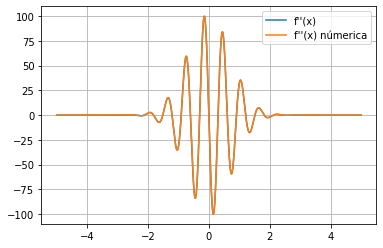

Error de la segunda derivada de orden 2 = 1.037370062562104e-05


In [35]:
x=(linspace(-5,5,1000000))
#Definimos la función g(x)
f=exp(-(x**2))*sin(10*x)
## La derivada analitica
fprima2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
##La derivada analítica para una malla no uniforme
fprima2_2_num=deriv_2(f,x)

#Graficamos ambas derivadas
plot(x,fprima2_2,label="f''(x)")
plot(x,fprima2_2_num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 2 =" ,
      max(abs(fprima2_2-fprima2_2_num)) )

Por último obtenemos la segunda derivada con la función: segunda derivada de orden cuatro.

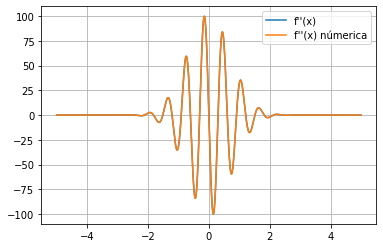

Error de la segunda derivada de orden 4 = 2.303298316519431e-07


In [36]:
x=(linspace(-5,5,5000))#
f=exp(-(x**2))*sin(10*x)
## La derivada analitica
fprima2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
##La derivada analítica para una malla no uniforme
fprima2_2_num=deriv(f,x)

#Graficamos ambas derivadas
plot(x,fprima2_2,label="f''(x)")
plot(x,fprima2_2_num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 4 =" ,
      max(abs(fprima2_2-fprima2_2_num)) )

Pasamos ahora a obtener la derivada para la función g(x).

Para la segunda derivada de orden 4:

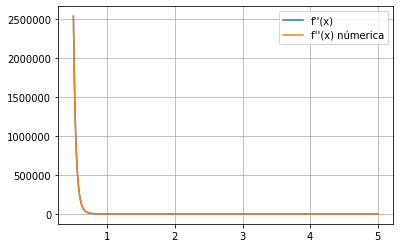

Error de la segunda derivada no uniforme = 0.017681884579360485


In [48]:
x=(linspace(0.5,5,78900))

y=-2/x**6+1/x**12
## La 2da derivada analitica
yprima2_1=-84/x**8+156/x**14
#La derivada analítica para una malla no uniforme

##La derivada analítica para una malla no uniforme
yprima2_1_num=deriv(y,x)

#Graficamos ambas derivadas
plot(x,yprima2_1,label="f''(x)")
plot(x,yprima2_1_num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2_1-yprima2_1_num)) )

C:\Users\marth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


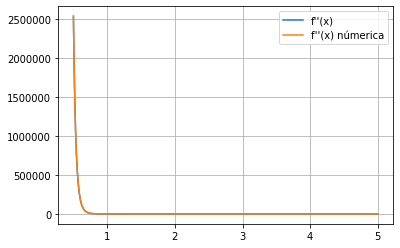

Error de la segunda derivada no uniforme = 65.61159481387585


In [49]:
x=(linspace(0.5,5,4905000))

y=-2/x**6+1/x**12
## La 2da derivada analitica
yprima2_1=-84/x**8+156/x**14
#La derivada analítica para una malla no uniforme

##La derivada analítica para una malla no uniforme
yprima2_1_num=deriv_2(y,x)

#Graficamos ambas derivadas
plot(x,yprima2_1,label="f''(x)")
plot(x,yprima2_1_num,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2_1-yprima2_1_num)) )

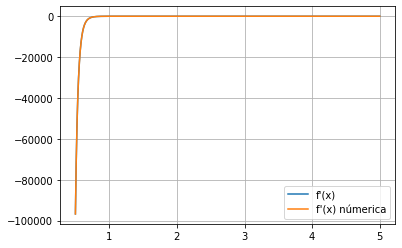

Error de la primera derivada no uniforme = 0.19191542400221806


In [41]:
x=(linspace(0.5,5,50000))##0.1
#x=(linspace(0.5,5,49005000))

y=-2/x**6+1/x**12
## La 2da derivada analitica

yprima1=12/x**7-12/x**13
#La derivada analítica para una malla no uniforme

##La derivada analítica para una malla no uniforme
yprima1num=deriv_1(y,x)

#Graficamos ambas derivadas
plot(x,yprima1,label="f'(x)")
plot(x,yprima1num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la primera derivada no uniforme =" ,
      max(abs(yprima1-yprima1num)) )

Se aprecia que no se obtuvó la malla correcta para generar un error menor a $10^{-5}$, esto debido a que anexarle más puntos a las mallas generaba un tiempo de ejecución muy grande que ya no era viable. Para poseer un menor error se podría obtener la ecuación para las derivadas de mayor orden, así como también el uso de mallas no uniformes que posean una alta acumulación de puntos en las secciones donde las funciones cambian en gran medida.

### 4. Suponga que tiene la función $sinc(x) =\frac{ sin(3x)}{3x}$ en el intervalo$ [−2π, 2π]$. Calcule la derivada analítica de dicha función y calcule la derivada numérica utilizando una malla uniforme.

### (a) Dependiendo del lenguaje de programación que utilice, averig\u''e la manera de obtener los tiempos de ejecución para calcular la derivada utilizando los algoritmos de 2o y 4o orden.

### (b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a $10^{-5}$ para cada algoritmo.

### (c) Realice la gráfica del “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por o menos considere 15 puntos, es decir 15 mallas deferentes, para realizar este ejercicio.

### (d) ¿Qué puede concluir de este experimento numérico?

Las derivadas analíticas de la función sinc(x) son:
    $$sinc'(x)=\frac{3x\cos(3x)-\sin(3x)}{3x^2}  $$

$$sinc''(x)=\frac{(2-9x^{2})\sin(3x)-6x\cos(3x)}{3x^{3}}$$

a) Para obtener los tiempos de ejecución se debe importar:

In [5]:
import time

Iniciamos obteniendo los tiempos de ejecución de la primer derivada en una malla uniforme.

In [20]:
#Iniciamos definiendo la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv_1(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejecución
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("El tiempo de ejecución de la primera derivada es: ",t_i,"s")

El tiempo de ejecución de la primera derivada es:  0.0220029354095459 s


Obteniendo una mejor aproximación:

In [19]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv_1(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la primera derivada es:  ",mean(t_is),"s")

Tiempo de ejecución, más aproximado, de la primera derivada es:   0.01831141710281372 s


Obteniendo el tiempo de ejecución para la segunda derivada de segundo orden en una malla no uniforme: 

In [18]:
#Obteniendo los tiempos de ejecución de la segunda derivada en una
#Iniciamos definiendo la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv_2(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejeción
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("Tiempo de ejecución de la segunda derivada de orden 2 es: ",t_i,"s")

Tiempo de ejecución de la segunda derivada de orden 2 es:  0.015996932983398438 s


Obteniendo una mejor aproximación del tiempo de ejecución:

In [17]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv_2(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la segunda derivada de orden 2:  ",mean(t_is),"s")

Tiempo de ejecución, más aproximado, de la segunda derivada de orden 2:   0.010043370723724365 s


Obteniendo el tiempo de ejecución para la segunda derivada de orden 4:

In [15]:
#Definimos la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejeción
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("Tiempo de ejecución de la segunda derivada de orden 4 es: ",t_i,"s")

Tiempo de ejecución de la segunda derivada de orden 4 es:  0.013000965118408203 s


In [12]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la segunda derivada de orden 4:  ",mean(t_is),"s")

Tiempo de ejecución, más aproximado, de la segunda derivada de orden 4:   0.010646178722381591 s


b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a 10−5 para cada algoritmo.

In [21]:
##Definimos la malla:
x=linspace(-2*pi,2*pi,7500)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
sinc=sin(3*x)/(3*x)
## La primer derivada analitica
sincprima1=(3*x*cos(3*x)-sin(3*x))/(3*x*x)
#la primer derivada númerica definida con malla no uniforme
sincprima1_num=deriv_1(sinc,x)

print("Error de la primer derivada no uniforme es:" ,
      max(abs(sincprima1-sincprima1_num)) )
print("El espacio entre los puntos es:",h)

Error de la primer derivada no uniforme es: 3.0087616169627296e-06
El espacio entre los puntos es: 0.0016757395138498055


Veamos el caso para la segunda derivada:

In [22]:
##Definimos la malla:
x=linspace(-2*pi,2*pi,2*550000)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
sinc=sin(3*x)/(3*x)
## La segunda derivada analitica
sincprima2=((2-9*x**2)*sin(3*x)-6*x*cos(3*x))/(3*x**3)
#La segunda derivada númerica de orden 2:
sincprima2_num=deriv_2(sinc,x)

print("Error de la segunda derivada de orden 2 es:" ,
      max(abs(sincprima2-sincprima2_num)) )
print("El espacio entre los puntos es:",h)

Error de la segunda derivada de orden 2 es: 1.6087392863239902e-05
El espacio entre los puntos es: 1.1423983671043914e-05


In [23]:
x=linspace(-2*pi,2*pi,2*550000)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la segunda derivada
sinc=sin(3*x)/(3*x)
## La segunda derivada analitica
sincprima2_1=((2-9*x**2)*sin(3*x)-6*x*cos(3*x))/(3*x**3)
#Obtenemos la segunda derivada númerica de orden 4:
sincprima2_num_1=deriv(sinc,x)

print("Error de la segunda derivada de orden 4 =" ,
      max(abs(sincprima2_1-sincprima2_num_1)) )
print("El espacio entre los puntos es:",h)

Error de la segunda derivada de orden 4 = 1.612089713076692e-05
El espacio entre los puntos es: 1.1423983671043914e-05


c) Realice la gráfica del “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por o menos considere 15 puntos, es decir 15 mallas deferentes, para realizar este ejercicio.

C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


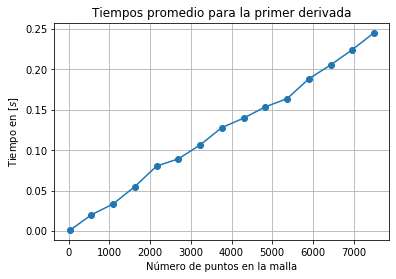

In [28]:
#Para la primer derivada
#Definimos el rango de números de malla en que evaluaremos el tiempo
num_puntos = linspace(25,7500,15)

tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    n_experimentos = 20
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv_1(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempos promedio para la primer derivada")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$s$]")
plot(num_puntos,tiempos,'o-')
grid()
show()

C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


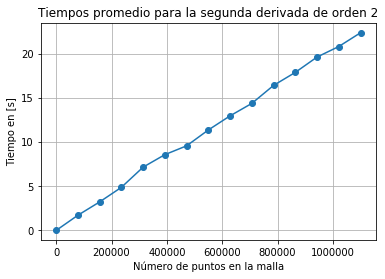

In [29]:
#Tiempos para la segunda derivada de malla no uniforme
#Definimos el rango de números de malla en que evaluaremos el tiempo
num_puntos = linspace(25,2*550000,15)

#print("El esparcimiento inicial es:",hi)
#y=linspace(-2*pi,0,500000)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    #h=x[1]-x[0]
    #print(h)
    n_experimentos = 2
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv_2(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempos promedio para la segunda derivada de orden 2")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [s]")
plot(num_puntos,tiempos,'o-')
grid()
show()

C:\Users\marth\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


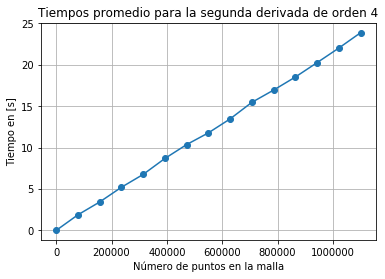

In [31]:
num_puntos = linspace(13,2*550000,15)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    n_experimentos = 2
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempos promedio para la segunda derivada de orden 4")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [s]")
plot(num_puntos,tiempos,'o-')
grid()
show()

d) De este experimento númerico podemos concluir que a más puntos le anexemos a la malla, mayor será el tiempo de ejecución, así como los tiempos de ejecución poseen un comportamiento lineal. Además, en el proceso de obtener las mallas adecuadas para que se cumpliera la condición pedida en el ejercicio, se aprecio que anexarle más puntos a la malla, no siempre nos genera una buena aproximación. Además, de que se debe escoger cuidadosamente la función con la cual se obtendrán las derivadas, ya que escoger la función correcta nos provocará que nuestra malla pose menos puntos y de esta manera el tiempo de ejecución sea menor.